In [3]:
from matplotlib import pyplot
import rasterio
from rasterio.plot import show
import numpy as np
import h3.api.numpy_int as h3
from scipy import ndimage
import geopandas as gpd

# increase the plot size
pyplot.rcParams['figure.dpi'] = 200

(<ColorInterp.red: 3>, <ColorInterp.green: 4>, <ColorInterp.blue: 5>)
(284, 327)


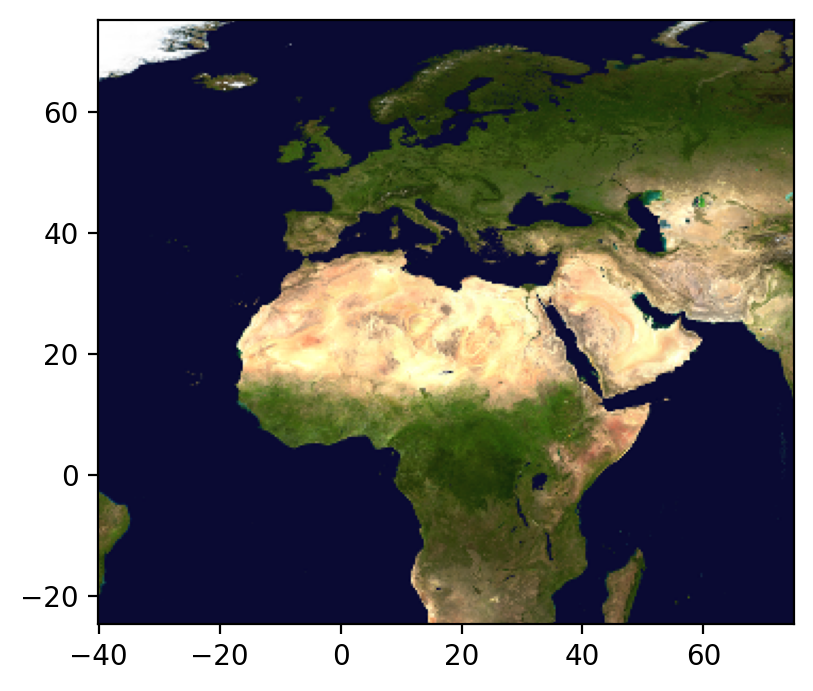

<AxesSubplot:>

In [5]:
src_dir = r'E:\paper\code\h3ronpy\data'
src = rasterio.open(src_dir + "/europe-and-north-africa.tif")
print(src.colorinterp)

green = src.read(2)
blue = src.read(3)
print(green.shape)

show(src)

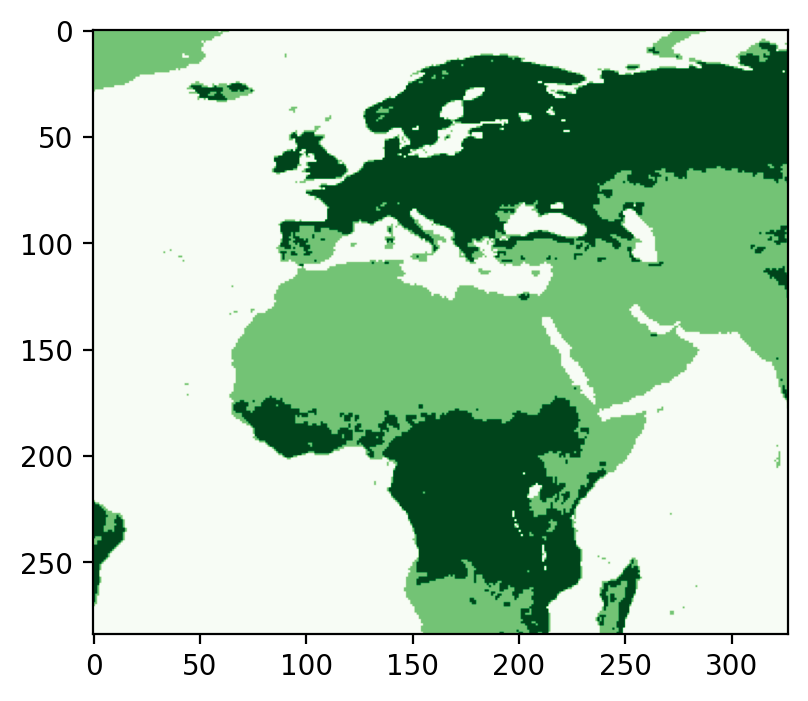

In [7]:
vegetation_mask = (green < 250) & (blue < 50)
ocean_mask = (green >= 6) & (green <= 14) & (blue >= 47) & (blue <= 54)
vegetation_nodata_value = 0

vegetation = np.full(green.shape, 10, dtype="int8")
vegetation[ocean_mask] = vegetation_nodata_value
vegetation[vegetation_mask] = 20
#pyplot.imshow(vegetation, cmap='Greens')

# smooth a bit to remove single pixels
vegetation = ndimage.gaussian_filter(vegetation, sigma=.7)
vegetation[vegetation <= 5] = vegetation_nodata_value
vegetation[(vegetation > 0) & (vegetation < 15)] = 1
vegetation[vegetation >= 15] = 2
vegetation[ocean_mask] = vegetation_nodata_value

vegetation_plot_args = dict(cmap='Greens', vmin=0, vmax=2)

pyplot.imshow(vegetation, **vegetation_plot_args)

In [10]:
from h3ronpy.raster import nearest_h3_resolution

h3_res = nearest_h3_resolution(vegetation.shape, src.transform, search_mode="smaller_than_pixel")
print(f"Using H3 resolution {h3_res}")

ModuleNotFoundError: No module named 'h3ronpy.h3ronpy'